# Web Mining and Applied NLP (44-620)

## Final Project: Article Summarizer

### Student Name: Graham Miller

#### [Link to My Repo](https://github.com/gmill88/article-summarizer)

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

You should bring in code from previous assignments to help you answer the questions below.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

In [10]:
from collections import Counter
import pickle
import requests
import spacy
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from textblob import TextBlob
from spacytextblob.spacytextblob import SpacyTextBlob
import nltk
nltk.download('punkt')


!pip list

print('All prereqs installed.')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/grahammiller/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Package            Version
------------------ -----------
annotated-types    0.6.0
appnope            0.1.4
asttokens          2.4.1
beautifulsoup4     4.12.3
blis               0.7.11
catalogue          2.0.10
certifi            2024.2.2
charset-normalizer 3.3.2
click              8.1.7
cloudpathlib       0.16.0
comm               0.2.2
confection         0.1.4
contourpy          1.2.1
cycler             0.12.1
cymem              2.0.8
debugpy            1.8.1
decorator          5.1.1
executing          2.0.1
fonttools          4.51.0
idna               3.7
ipykernel          6.29.4
ipython            8.23.0
jedi               0.19.1
Jinja2             3.1.3
joblib             1.4.0
jupyter_client     8.6.1
jupyter_core       5.7.2
kiwisolver         1.4.5
langcodes          3.3.0
MarkupSafe         2.1.5
matplotlib         3.8.4
matplotlib-inline  0.1.6
murmurhash         1.0.10
nest-asyncio       1.6.0
nltk               3.8.1
numpy              1.26.4
packaging          24.0
pandas

1. Find on the internet an article or blog post about a topic that interests you and you are able to get the text for using the technologies we have applied in the course.  Get the html for the article and store it in a file (which you must submit with your project)

In [71]:
import requests
from bs4 import BeautifulSoup
import pickle

url = "https://www.mlb.com/news/cardinals-2024-season-preview-predictions?partnerID=web_article-share"
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')
article_content = str(soup.find("article"))

with open('article_content.pkl', 'wb') as file:
    pickle.dump(article_content, file)

In [85]:
import requests

url = "https://www.mlb.com/news/cardinals-2024-season-preview-predictions?partnerID=web_article-share"
response = requests.get(url)

with open('article_content.html', 'w', encoding='utf-8') as file:
    file.write(response.text)

In [86]:
from bs4 import BeautifulSoup

# Open the HTML file and read its content
with open('article_content.html', 'r', encoding='utf-8') as file:
    html_content = file.read()

# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(html_content, 'html.parser')

# Find the main content by inspecting different elements
main_content = soup.find('article') or soup.find('section') or soup.find('div', class_='main-body')

# Check if the main content was found
if main_content:
    # Create a new BeautifulSoup object with only the main content
    cleaned_soup = BeautifulSoup(str(main_content), 'html.parser')

    # Save the cleaned HTML content to a new file
    with open('cleaned_article.html', 'w', encoding='utf-8') as file:
        file.write(cleaned_soup.prettify())
else:
    print("Main content not found. Try inspecting different elements.")

In [87]:
from bs4 import BeautifulSoup

with open('cleaned_article.html', 'r', encoding='utf-8') as file:
    html_content = file.read()

soup = BeautifulSoup(html_content, 'html.parser')

text = soup.get_text()


print(text)




   What's on deck for the Cards in 2024?
  

   March 25th, 2024
  








       John Denton
      

       @
       
       JohnDenton555
      




      Share
     






           share-square-176460
          




























      This story was excerpted from John Denton's Cardinals Beat newsletter. To read the full newsletter,
     

      click here
     
     .
     
      And
     

      subscribe
     

      to get it regularly in your inbox.
     






     MESA, Ariz. -- When Cardinals president of baseball operations John Mozeliak stressed late in 2023 that the club would be looking to add three starting pitchers for the upcoming season, fans started dreaming wildly about the scenarios that could potentially materialize.
    





     Was there a baseball world where the Cards would ink National League Cy Young Award winner Blake Snell, bring Jordan Montgomery back to St. Louis and trade for Dylan Cease? What if they lured Aaron Nola out of Philadel

2. Read in your article's html source from the file you created in question 1 and do sentiment analysis on the article/post's text (use `.get_text()`).  Print the polarity score with an appropriate label.  Additionally print the number of sentences in the original article (with an appropriate label)

In [141]:
from textblob import TextBlob
from bs4 import BeautifulSoup

# Load the cleaned HTML content from the file
with open('cleaned_article.html', 'r', encoding='utf-8') as file:
    cleaned_html = file.read()

# Parse the HTML content
soup = BeautifulSoup(cleaned_html, 'html.parser')

# Extract text from paragraphs in the HTML
paragraphs = soup.find_all('p')
article_text = ' '.join([paragraph.get_text() for paragraph in paragraphs])

# Perform sentiment analysis on the article's text
blob = TextBlob(article_text)
polarity_score = blob.sentiment.polarity

# Count the number of sentences
sentences = blob.sentences
num_sentences = len(sentences)

# Print the polarity score and the number of sentences
print(f'Polarity Score: {polarity_score:.2f}')
print(f'Number of Sentences: {num_sentences}')

Polarity Score: 0.14
Number of Sentences: 40


3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels)

In [96]:
import spacy
from collections import Counter
from bs4 import BeautifulSoup

# Read the HTML content from the file
with open('cleaned_article.html', 'r', encoding='utf-8') as file:
    html_content = file.read()

# Parse the HTML content
soup = BeautifulSoup(html_content, 'html.parser')

# Extract visible text from the HTML
visible_text = soup.get_text()

# Load the English language model
nlp = spacy.load('en_core_web_sm')

# Process the visible text using spaCy
doc = nlp(visible_text)

# Extract tokens from the processed text
tokens = [token.text.lower() for token in doc if token.is_alpha and not token.is_stop]

# Count the frequency of each token
token_counter = Counter(tokens)

# Find the 5 most common tokens
common_tokens = token_counter.most_common(5)

print("Common Tokens (without stop words):")
for token, frequency in common_tokens:
    print(f"{token}: {frequency}")

print("\nAll tokens with frequencies:")
for token, frequency in token_counter.items():
    print(f"{token}: {frequency}")

Common Tokens (without stop words):
cardinals: 9
cards: 8
season: 7
gray: 7
staff: 7

All tokens with frequencies:
deck: 1
cards: 8
march: 1
john: 3
denton: 2
share: 2
story: 1
excerpted: 1
cardinals: 9
beat: 1
newsletter: 2
read: 1
click: 1
subscribe: 1
regularly: 1
inbox: 1
mesa: 1
president: 1
baseball: 4
operations: 1
mozeliak: 1
stressed: 1
late: 1
club: 2
looking: 2
add: 1
starting: 3
pitchers: 1
upcoming: 1
season: 7
fans: 1
started: 1
dreaming: 1
wildly: 1
scenarios: 1
potentially: 1
materialize: 1
world: 2
ink: 1
national: 1
league: 3
cy: 2
young: 2
award: 1
winner: 1
blake: 1
snell: 1
bring: 2
jordan: 1
montgomery: 1
louis: 3
trade: 2
dylan: 1
cease: 1
lured: 1
aaron: 1
nola: 1
philadelphia: 1
finally: 2
closed: 1
deal: 2
sonny: 2
gray: 7
traded: 1
tyler: 1
glasnow: 1
lars: 1
nootbaar: 1
family: 1
friend: 1
yoshinobu: 1
yamamoto: 1
marcus: 1
stroman: 1
returning: 2
jack: 1
flaherty: 1
snag: 1
player: 1
coveted: 1
years: 3
tried: 1
unsuccessfully: 1
past: 1
took: 1
decidedly: 

4. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels).

In [95]:
import spacy
from collections import Counter
from bs4 import BeautifulSoup

# Read the HTML content from the file
with open('cleaned_article.html', 'r', encoding='utf-8') as file:
    html_content = file.read()

# Parse the HTML content
soup = BeautifulSoup(html_content, 'html.parser')

# Extract visible text from the HTML
visible_text = soup.get_text()

# Load the English language model
nlp = spacy.load('en_core_web_sm')

# Process the visible text using spaCy
doc = nlp(visible_text)

# Extract lemmas from the processed text
lemmas = [token.lemma_.lower() for token in doc if token.is_alpha and not token.is_stop]

# Count the frequency of each lemma
lemma_counter = Counter(lemmas)

# Find the 5 most common lemmas
common_lemmas = lemma_counter.most_common(5)

print("Common Lemmas (without stop words):")
for lemma, frequency in common_lemmas:
    print(f"{lemma}: {frequency}")

print("\nAll lemmas with frequencies:")
for lemma, frequency in lemma_counter.items():
    print(f"{lemma}: {frequency}")

Common Lemmas (without stop words):
cards: 8
cardinals: 8
season: 8
gray: 7
staff: 7

All lemmas with frequencies:
deck: 1
cards: 8
march: 1
john: 3
denton: 2
share: 2
story: 1
excerpt: 1
cardinals: 8
beat: 1
newsletter: 2
read: 1
click: 1
subscribe: 1
regularly: 1
inbox: 1
mesa: 1
president: 1
baseball: 4
operation: 1
mozeliak: 1
stress: 1
late: 3
club: 2
look: 3
add: 1
start: 4
pitcher: 1
upcoming: 1
season: 8
fan: 1
dream: 1
wildly: 1
scenario: 1
potentially: 1
materialize: 1
world: 2
ink: 2
national: 1
league: 3
cy: 2
young: 2
award: 1
winner: 1
blake: 1
snell: 1
bring: 2
jordan: 1
montgomery: 1
louis: 3
trade: 4
dylan: 1
cease: 1
lure: 1
aaron: 1
nola: 1
philadelphia: 1
finally: 2
close: 1
deal: 2
sonny: 2
gray: 7
tyler: 1
glasnow: 1
lars: 1
nootbaar: 1
family: 1
friend: 1
yoshinobu: 1
yamamoto: 1
marcus: 1
stroman: 1
return: 2
jack: 1
flaherty: 1
snag: 1
player: 1
covet: 1
year: 5
try: 1
unsuccessfully: 1
past: 1
take: 2
decidedly: 1
different: 1
path: 1
fill: 1
rotation: 1
free:

5. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

In [139]:
from bs4 import BeautifulSoup
from textblob import TextBlob

# Read the HTML content from the file
with open('cleaned_article.html', 'r', encoding='utf-8') as file:
    html_content = file.read()

# Parse the HTML content
soup = BeautifulSoup(html_content, 'html.parser')

# Extract visible text from the HTML
visible_text = ''
for paragraph in soup.find_all('p'):  # Assuming paragraphs are contained in <p> tags
    visible_text += paragraph.get_text() + ' '

# Define interesting tokens for scoring
interesting_tokens = ["cardinals", "cards", "season", "gray", "staff"]

# Define function to score a sentence based on interesting tokens
def score_sentence_by_token(sentence, interesting_tokens):
    tokens = sentence.split()
    interesting_token_count = sum(1 for token in tokens if token.lower() in interesting_tokens)
    score = interesting_token_count / len(tokens) if tokens else 0
    return score

# Use TextBlob to split the article content into sentences
blob = TextBlob(visible_text)
sentences = blob.sentences

# Iterate over each sentence and print the token score
for i, sentence in enumerate(sentences, start=1):
    token_score = score_sentence_by_token(str(sentence), interesting_tokens)
    print(f"Sentence {i} Token Score:", token_score)

# Calculate token scores for all sentences
token_scores = [score_sentence_by_token(str(sentence), interesting_tokens) for sentence in sentences]

Sentence 1 Token Score: 0.08333333333333333
Sentence 2 Token Score: 0.0
Sentence 3 Token Score: 0.0
Sentence 4 Token Score: 0.024390243902439025
Sentence 5 Token Score: 0.03333333333333333
Sentence 6 Token Score: 0.047619047619047616
Sentence 7 Token Score: 0.0
Sentence 8 Token Score: 0.0
Sentence 9 Token Score: 0.05555555555555555
Sentence 10 Token Score: 0.023809523809523808
Sentence 11 Token Score: 0.0
Sentence 12 Token Score: 0.0
Sentence 13 Token Score: 0.09375
Sentence 14 Token Score: 0.07142857142857142
Sentence 15 Token Score: 0.1
Sentence 16 Token Score: 0.0
Sentence 17 Token Score: 0.06451612903225806
Sentence 18 Token Score: 0.04
Sentence 19 Token Score: 0.0
Sentence 20 Token Score: 0.038461538461538464
Sentence 21 Token Score: 0.047619047619047616
Sentence 22 Token Score: 0.0
Sentence 23 Token Score: 0.05
Sentence 24 Token Score: 0.0
Sentence 25 Token Score: 0.043478260869565216
Sentence 26 Token Score: 0.045454545454545456
Sentence 27 Token Score: 0.0
Sentence 28 Token Sco

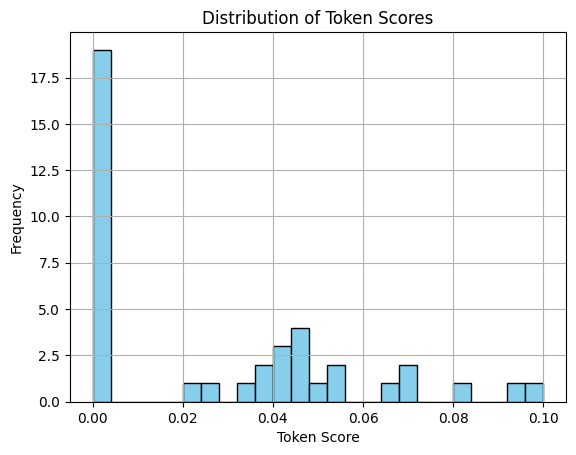

In [140]:
plt.hist(token_scores, bins=25, color='skyblue', edgecolor='black')
plt.title('Distribution of Token Scores')
plt.xlabel('Token Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

6. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

In [137]:
from bs4 import BeautifulSoup
from textblob import TextBlob
import spacy

# Load the English language model
nlp = spacy.load('en_core_web_sm')

# Read the HTML content from the file
with open('cleaned_article.html', 'r', encoding='utf-8') as file:
    html_content = file.read()

# Parse the HTML content
soup = BeautifulSoup(html_content, 'html.parser')

# Extract visible text from the HTML, excluding headings
paragraphs = soup.find_all('p')  # Assuming paragraphs are contained in <p> tags
visible_text = ' '.join(paragraph.get_text() for paragraph in paragraphs)

# Define interesting lemmas for scoring
interesting_lemmas = ["cardinals", "cards", "season", "gray", "staff"]

# Define function to score a sentence based on interesting lemmas
def score_sentence_by_lemma(sentence, interesting_lemmas):
    doc = nlp(sentence)
    lemmas = [token.lemma_.lower() for token in doc if token.is_alpha and token.lemma_.lower() in interesting_lemmas]
    interesting_lemma_count = len(lemmas)
    score = interesting_lemma_count / len(doc) if doc else 0
    return score

# Use TextBlob to split the article content into sentences
blob = TextBlob(visible_text)
sentences = blob.sentences

# Iterate over each sentence and print the lemma score
for i, sentence in enumerate(sentences, start=1):
    lemma_score = score_sentence_by_lemma(str(sentence), interesting_lemmas)
    print(f"Sentence {i} Lemma Score:", lemma_score)

# Calculate lemma scores for all sentences
lemma_scores = [score_sentence_by_lemma(str(sentence), interesting_lemmas) for sentence in sentences]


Sentence 1 Lemma Score: 0.0625
Sentence 2 Lemma Score: 0.0
Sentence 3 Lemma Score: 0.0
Sentence 4 Lemma Score: 0.045454545454545456
Sentence 5 Lemma Score: 0.03125
Sentence 6 Lemma Score: 0.043478260869565216
Sentence 7 Lemma Score: 0.0
Sentence 8 Lemma Score: 0.0
Sentence 9 Lemma Score: 0.05128205128205128
Sentence 10 Lemma Score: 0.017857142857142856
Sentence 11 Lemma Score: 0.0
Sentence 12 Lemma Score: 0.043478260869565216
Sentence 13 Lemma Score: 0.08108108108108109
Sentence 14 Lemma Score: 0.058823529411764705
Sentence 15 Lemma Score: 0.08695652173913043
Sentence 16 Lemma Score: 0.0
Sentence 17 Lemma Score: 0.11428571428571428
Sentence 18 Lemma Score: 0.037037037037037035
Sentence 19 Lemma Score: 0.0
Sentence 20 Lemma Score: 0.03333333333333333
Sentence 21 Lemma Score: 0.034482758620689655
Sentence 22 Lemma Score: 0.0
Sentence 23 Lemma Score: 0.12
Sentence 24 Lemma Score: 0.0
Sentence 25 Lemma Score: 0.08
Sentence 26 Lemma Score: 0.029411764705882353
Sentence 27 Lemma Score: 0.0
S

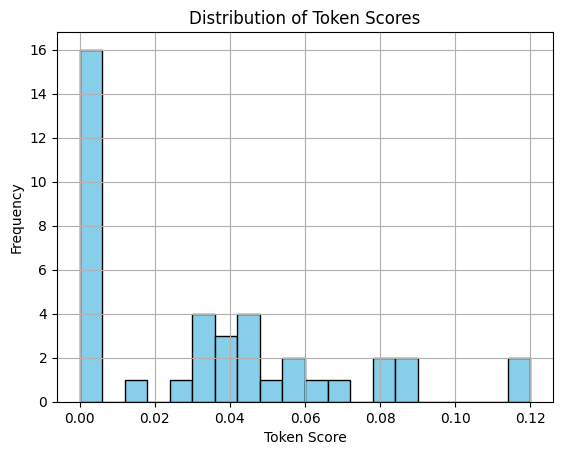

In [138]:
plt.hist(lemma_scores, bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Token Scores')
plt.xlabel('Token Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

7. Using the histograms from questions 5 and 6, decide a "cutoff" score for tokens and lemmas such that fewer than half the sentences would have a score greater than the cutoff score.  Record the scores in this Markdown cell

* Cutoff Score (tokens): 0.06
* Cutoff Score (lemmas): 0.06

Feel free to change these scores as you generate your summaries.  Ideally, we're shooting for at least 6 sentences for our summary, but don't want more than 10 (these numbers are rough estimates; they depend on the length of your article).

8. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on tokens) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

In [121]:
from bs4 import BeautifulSoup
from textblob import TextBlob

# Read the HTML content from the file
with open('cleaned_article.html', 'r', encoding='utf-8') as file:
    html_content = file.read()

# Parse the HTML content
soup = BeautifulSoup(html_content, 'html.parser')

# Extract visible text from the HTML, excluding headings and subheadings
visible_text = ''
for element in soup.find_all(['p', 'span']):  # Assuming paragraphs are contained in <p> tags and spans
    visible_text += element.get_text() + ' '

# Load the English language model
nlp = spacy.load('en_core_web_sm')

# Define interesting tokens for scoring
interesting_tokens = ["cardinals", "cards", "season", "gray", "staff"]

# Define the cutoff score for selecting sentences
cutoff_score = 0.05

# Initialize an empty list to store selected sentences for the summary
summary_sentences = []

# Define function to score a sentence based on interesting tokens
def score_sentence_by_token(sentence, interesting_tokens):
    tokens = sentence.split()
    interesting_token_count = sum(1 for token in tokens if token.lower() in interesting_tokens)
    score = interesting_token_count / len(tokens) if tokens else 0
    return score

# Use TextBlob to split the article content into sentences
blob = TextBlob(visible_text)
sentences = blob.sentences

# Iterate over each sentence and select those with scores above the cutoff
for sentence in sentences:
    token_score = score_sentence_by_token(str(sentence), interesting_tokens)
    if token_score > cutoff_score:
        summary_sentences.append(str(sentence))

# Generate the summary text by joining the selected sentences
# Concatenate the sentences into a single paragraph
# Remove line breaks and extra spaces between sentences
formatted_sentences = [sentence.strip() for sentence in summary_sentences]

# Concatenate the sentences into a single paragraph
formatted_summary = " ".join(formatted_sentences)

# Replace multiple spaces with a single space
formatted_summary = " ".join(formatted_summary.split())

# Print the formatted summary
print("Summary:")
print(formatted_summary)

Summary:
John Denton This story was excerpted from John Denton's Cardinals Beat newsletter. The Cardinals did finally snag Gray -- a player they coveted for years and had tried unsuccessfully to deal for in the past -- but they took a decidedly different path in filling out the rotation. The question now, of course, is this: Did the Cardinals do enough to patch a pitching staff that left its fingerprints all over the franchise’s worst season in 33 years in 2023? Gray is already injured , and Lynn and Gibson have looked shaky this spring. If Lynn and Gibson can’t stabilize the staff and stay healthy, can the Cards avoid a similar fate in 2024? The starting staff must get -- and stay -- healthy With a very difficult start to the season, the Cardinals' revamped pitching staff will be put to the test right away. Sonny Gray Despite Gray’s right hamstring injury, he impressed the club with his strong communication skills and his gameplanning. Bold prediction Cards will win the NL Central Sim

9. Print the polarity score of your summary you generated with the token scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

In [122]:
from textblob import TextBlob

# Convert the formatted summary to a TextBlob object
summary_blob = TextBlob(formatted_summary)

# Calculate the polarity score of the summary
summary_polarity_score = summary_blob.sentiment.polarity

# Count the number of sentences in the summarized article
num_summary_sentences = len(formatted_sentences)

# Print the polarity score and the number of sentences
print("Polarity Score of the Summary:", summary_polarity_score)
print("Number of Sentences in the Summarized Article:", num_summary_sentences)

Polarity Score of the Summary: 0.08942099567099566
Number of Sentences in the Summarized Article: 8


10. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on lemmas) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

In [135]:
import spacy
from bs4 import BeautifulSoup
from textblob import TextBlob

# Read the HTML content from the file
with open('cleaned_article.html', 'r', encoding='utf-8') as file:
    html_content = file.read()

# Parse the HTML content
soup = BeautifulSoup(html_content, 'html.parser')

# Extract visible text from the HTML, excluding headings and subheadings
visible_text = ''
for element in soup.find_all(['p', 'span']):  # Assuming paragraphs are contained in <p> tags and spans
    visible_text += element.get_text() + ' '

# Load the English language model
nlp = spacy.load('en_core_web_sm')

# Define interesting lemmas for scoring
interesting_lemmas = ["cardinals", "cards", "season", "gray", "staff"]

# Define the cutoff score for selecting sentences
cutoff_score = 0.15

# Initialize an empty list to store selected sentences for the summary
summary_sentences = []

# Define function to score a sentence based on interesting lemmas
def score_sentence_by_lemma(sentence, interesting_lemmas):
    doc = nlp(sentence)
    lemmas = [token.lemma_.lower() for token in doc if token.is_alpha and not token.is_stop]
    interesting_lemma_count = sum(1 for lemma in lemmas if lemma in interesting_lemmas)
    score = interesting_lemma_count / len(lemmas) if lemmas else 0
    return score

# Use TextBlob to split the article content into sentences
blob = TextBlob(visible_text)
sentences = blob.sentences

# Iterate over each sentence and select those with scores above the cutoff
for sentence in sentences:
    lemma_score = score_sentence_by_lemma(str(sentence), interesting_lemmas)
    if lemma_score > cutoff_score:
        summary_sentences.append(str(sentence))

# Generate the summary text by joining the selected sentences
# Concatenate the sentences into a single paragraph
# Remove line breaks and extra spaces between sentences
formatted_sentences = [sentence.strip() for sentence in summary_sentences]

# Concatenate the sentences into a single paragraph
formatted_summary = " ".join(formatted_sentences)

# Replace multiple spaces with a single space
formatted_lemma_summary = " ".join(formatted_summary.split())

# Print the formatted summary
print("Summary:")
print(formatted_lemma_summary)

Summary:
The question now, of course, is this: Did the Cardinals do enough to patch a pitching staff that left its fingerprints all over the franchise’s worst season in 33 years in 2023? If Lynn and Gibson can’t stabilize the staff and stay healthy, can the Cards avoid a similar fate in 2024? The starting staff must get -- and stay -- healthy With a very difficult start to the season, the Cardinals' revamped pitching staff will be put to the test right away. However, they won’t be able to support the staff without healthy and productive seasons from Gray, Lynn, Gibson and Matz. For as much talk as there has been about the revamped starting staff, the Cardinals also worked to turn over their bullpen mix. Sonny Gray Despite Gray’s right hamstring injury, he impressed the club with his strong communication skills and his gameplanning. He will bring some much-needed toughness and fire to the staff.


11. Print the polarity score of your summary you generated with the lemma scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

In [136]:
from textblob import TextBlob

# Convert the formatted summary to a TextBlob object
summary_blob = TextBlob(formatted_lemma_summary)

# Calculate the polarity score of the summary
summary_polarity_score = summary_blob.sentiment.polarity

# Count the number of sentences in the summarized article
num_summary_sentences = len(formatted_sentences)

# Print the polarity score and the number of sentences
print("Polarity Score of the Summary:", summary_polarity_score)
print("Number of Sentences in the Summarized Article:", num_summary_sentences)

Polarity Score of the Summary: 0.15967261904761904
Number of Sentences in the Summarized Article: 7


12.  Compare your polarity scores of your summaries to the polarity scores of the initial article.  Is there a difference?  Why do you think that may or may not be?.  Answer in this Markdown cell.  

13. Based on your reading of the original article, which summary do you think is better (if there's a difference).  Why do you think this might be?